# Visualize Unlabelled Predictions

This notebook visualizes predictions produced by `predict_unlabelled_resnet50.py`.

It expects a CSV file with the columns:
- `image_path`
- `pred_class_index`
- `pred_class_label`
- `confidence`

The notebook will create:
- a bar chart of predicted class counts, and
- a histogram of prediction confidences.

In [1]:
# Imports
import csv
import os
from collections import Counter
from typing import List, Tuple

import matplotlib.pyplot as plt

In [2]:
# Helper functions copied from visualize_unlabelled_predictions.py,
# slightly adapted to be used interactively in this notebook.

def read_predictions(csv_path: str) -> Tuple[List[str], List[str], List[float]]:
    """Read predictions CSV and return image paths, labels and confidences.

    Returns three lists: image_paths, labels, confidences.
    """

    image_paths: List[str] = []
    labels: List[str] = []
    confidences: List[float] = []

    with open(csv_path, 'r', newline='') as f:
        reader = csv.DictReader(f)
        for row in reader:
            image_paths.append(row['image_path'])

            # Prefer human-readable label; fall back to index if empty.
            label = row.get('pred_class_label') or row.get('pred_class_index', '')
            labels.append(str(label))

            try:
                conf = float(row['confidence'])
            except (KeyError, ValueError):
                conf = 0.0
            confidences.append(conf)

    return image_paths, labels, confidences


def plot_class_distribution(labels: List[str], output_path: str = None) -> None:
    """Plot a bar chart of predicted class counts.

    If `output_path` is given, save the figure there; otherwise just display it.
    """

    counts = Counter(labels)

    # Sort classes by count (descending) for a cleaner plot.
    classes, freqs = zip(*sorted(counts.items(), key=lambda x: x[1], reverse=True))

    plt.figure(figsize=(max(6, 0.5 * len(classes)), 4))
    plt.bar(range(len(classes)), freqs)
    plt.xticks(range(len(classes)), classes, rotation=90)
    plt.xlabel('Predicted class')
    plt.ylabel('Number of images')
    plt.title('Predicted class distribution (unlabelled data)')
    plt.tight_layout()
    if output_path is not None:
        plt.savefig(output_path, dpi=200)
    plt.show()


def plot_confidence_histogram(confidences: List[float], output_path: str = None) -> None:
    """Plot histogram of prediction confidences.

    If `output_path` is given, save the figure there; otherwise just display it.
    """

    plt.figure(figsize=(6, 4))
    plt.hist(confidences, bins=20, range=(0.0, 1.0), edgecolor='black')
    plt.xlabel('Prediction confidence')
    plt.ylabel('Number of images')
    plt.title('Prediction confidence histogram (unlabelled data)')
    plt.tight_layout()
    if output_path is not None:
        plt.savefig(output_path, dpi=200)
    plt.show()

## Configure paths

Set the path to the predictions CSV file produced by `predict_unlabelled_resnet50.py`,
and choose an optional output directory for saving the plots (can be left empty to
only show the figures inline).

In [3]:
# Path to the CSV with predictions (edit this to your file)
pred_csv_path = '/mnt/class_data/Nele/ROIs_August2024/predictions_resnet50_St01.csv'

# Optional: directory where plots will be saved; if empty, figures are only shown inline.
output_dir = 'visualizations_unlabelled_notebook'

# Create output directory if specified.
if output_dir:
    os.makedirs(output_dir, exist_ok=True)

pred_csv_path

'/mnt/class_data/Nele/ROIs_August2024/predictions_resnet50_St01.csv'

## Load predictions

This cell reads the CSV file and reports how many predictions were loaded.

In [4]:
# Read predictions from the CSV file.
if not os.path.exists(pred_csv_path):
    raise FileNotFoundError(f'Predictions CSV not found: {pred_csv_path}')

image_paths, labels, confidences = read_predictions(pred_csv_path)
len(image_paths), image_paths[:5]

(44412,
 ['/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0001.tiff_ROI_15.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0001.tiff_ROI_6.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0001.tiff_ROI_8.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0002.tiff_ROI_10.tif',
  '/mnt/class_data/Nele/ROIs_August2024/Station01/Basler_avA2300-25gm__23232601__20240826_113326867_0002.tiff_ROI_19.tif'])

## Plot class distribution

Bar chart of how often each predicted class occurs in the unlabelled data.

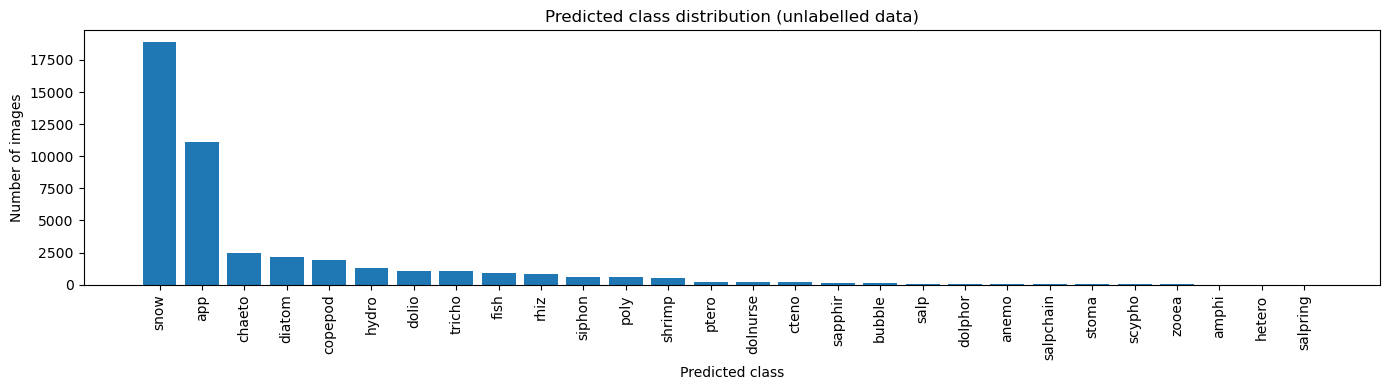

In [12]:
# Plot and optionally save the class distribution.
class_dist_path = os.path.join(output_dir, 'class_distribution.png') if output_dir else None
plot_class_distribution(labels, class_dist_path)

## Plot confidence histogram

Histogram of model prediction confidences, to see how certain the model is overall.

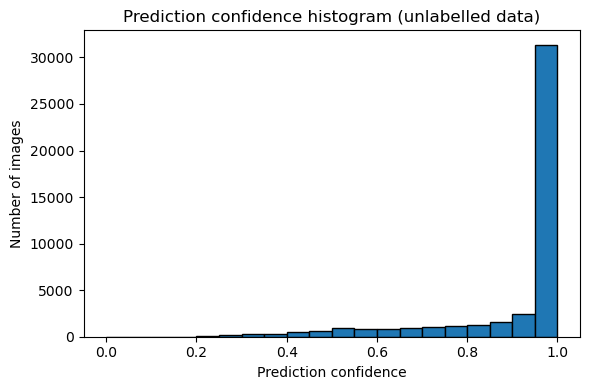

In [6]:
# Plot and optionally save the confidence histogram.
conf_hist_path = os.path.join(output_dir, 'confidence_histogram.png') if output_dir else None
plot_confidence_histogram(confidences, conf_hist_path)

## Most and least confident images per class



The following cells will show, for each predicted class:



- the 5 most confident images, and

- the 5 least confident images.



This helps to visually inspect what the model is very sure about and where it is uncertain.

Class 'amphi' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7231.tiff_ROI_14.tif, Confidence: 0.6257
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4658.tiff_ROI_2.tif, Confidence: 0.4298
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11994.tiff_ROI_1.tif, Confidence: 0.4211


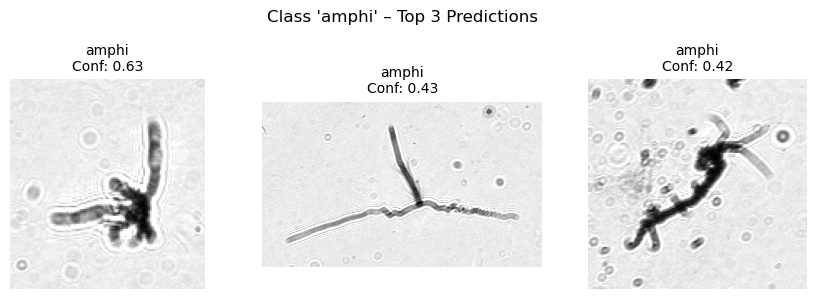

Class 'anemo' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13688.tiff_ROI_1.tif, Confidence: 0.9999
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13895.tiff_ROI_1.tif, Confidence: 0.9991
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1462.tiff_ROI_0.tif, Confidence: 0.9987


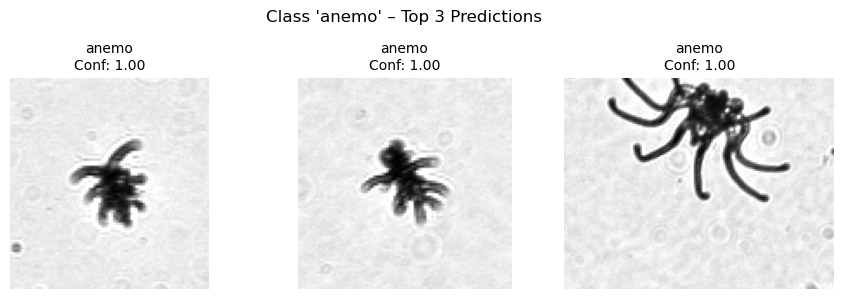

Class 'app' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0026.tiff_ROI_21.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0706.tiff_ROI_6.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11822.tiff_ROI_5.tif, Confidence: 1.0000


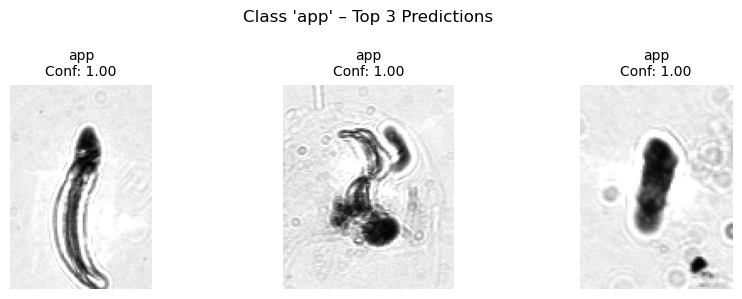

Class 'bubble' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0412.tiff_ROI_8.tif, Confidence: 0.9993
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0330.tiff_ROI_14.tif, Confidence: 0.9992
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12854.tiff_ROI_12.tif, Confidence: 0.9991


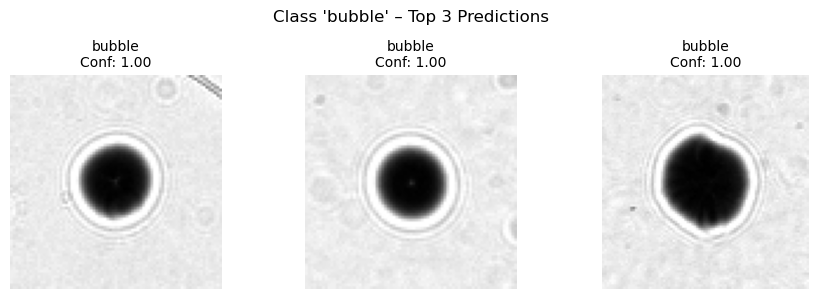

Class 'chaeto' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11290.tiff_ROI_16.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11553.tiff_ROI_21.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7137.tiff_ROI_0.tif, Confidence: 1.0000


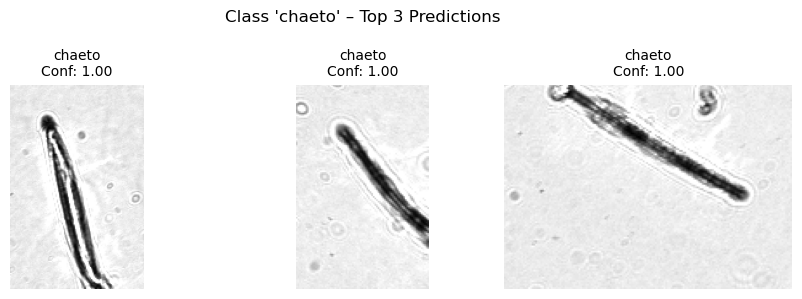

Class 'copepod' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12150.tiff_ROI_1.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3504.tiff_ROI_1.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3585.tiff_ROI_10.tif, Confidence: 1.0000


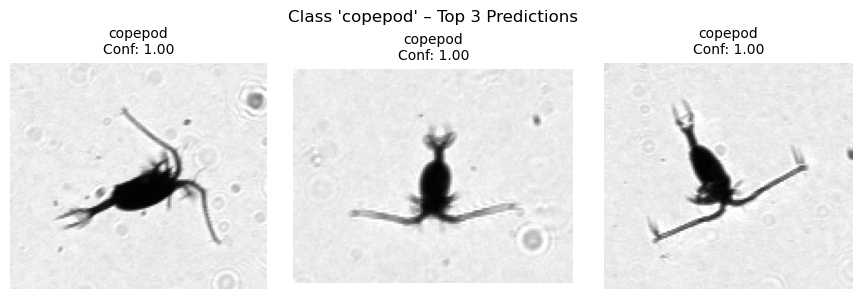

Class 'cteno' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4980.tiff_ROI_8.tif, Confidence: 0.9998
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2037.tiff_ROI_13.tif, Confidence: 0.9998
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2922.tiff_ROI_0.tif, Confidence: 0.9998


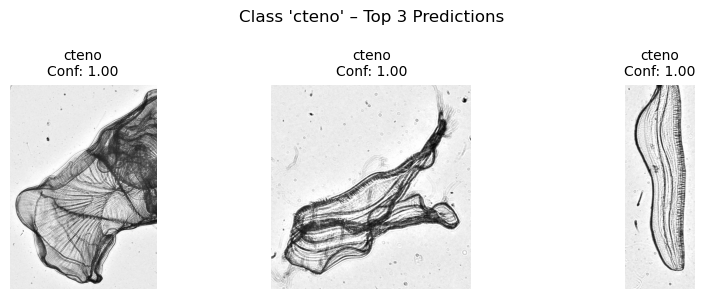

Class 'diatom' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0096.tiff_ROI_12.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8260.tiff_ROI_11.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3822.tiff_ROI_34.tif, Confidence: 1.0000


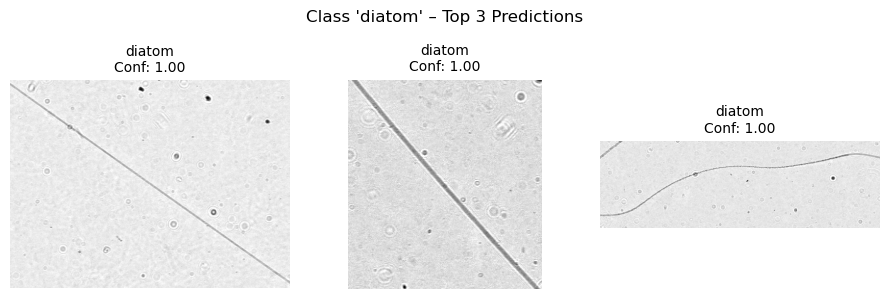

Class 'dolio' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5435.tiff_ROI_9.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8342.tiff_ROI_29.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9593.tiff_ROI_19.tif, Confidence: 1.0000


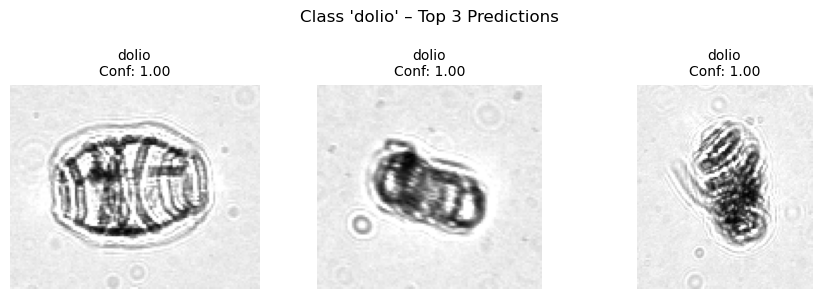

Class 'dolnurse' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13082.tiff_ROI_24.tif, Confidence: 0.9999
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3850.tiff_ROI_11.tif, Confidence: 0.9997
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6646.tiff_ROI_17.tif, Confidence: 0.9996


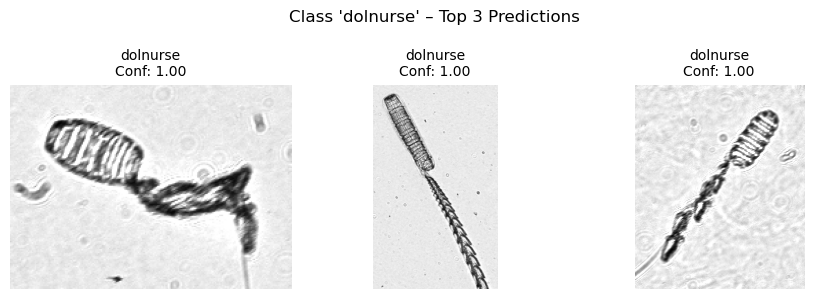

Class 'dolphor' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9123.tiff_ROI_12.tif, Confidence: 0.9932
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0083.tiff_ROI_21.tif, Confidence: 0.9863
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6109.tiff_ROI_15.tif, Confidence: 0.9817


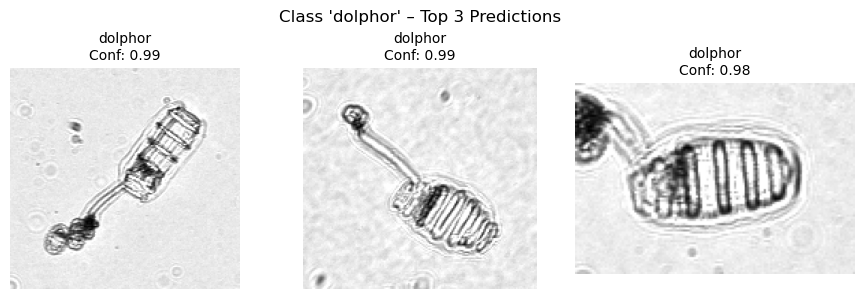

Class 'fish' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5671.tiff_ROI_12.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2072.tiff_ROI_24.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12307.tiff_ROI_1.tif, Confidence: 1.0000


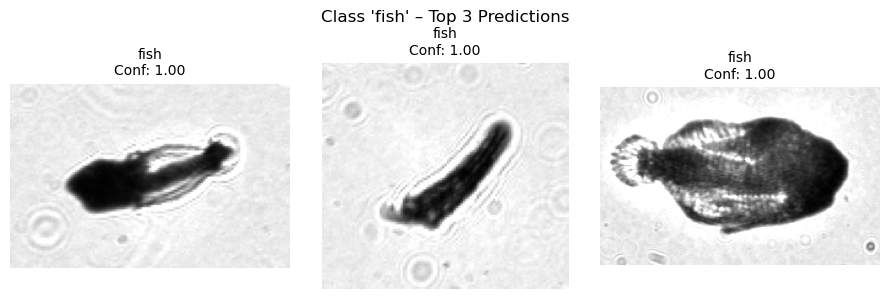

Class 'hetero' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10978.tiff_ROI_9.tif, Confidence: 0.5733
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1821.tiff_ROI_18.tif, Confidence: 0.4725
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10792.tiff_ROI_7.tif, Confidence: 0.3770


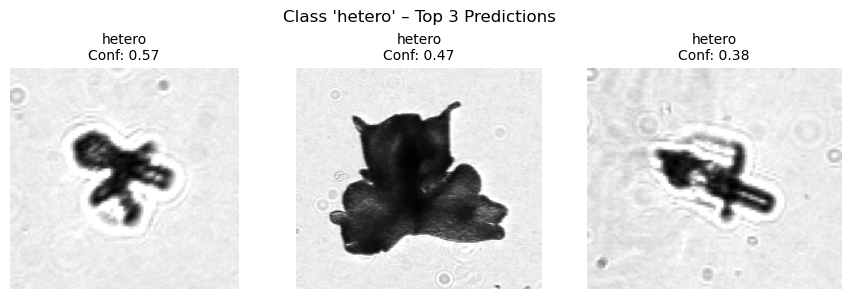

Class 'hydro' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2708.tiff_ROI_40.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7185.tiff_ROI_27.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2646.tiff_ROI_11.tif, Confidence: 1.0000


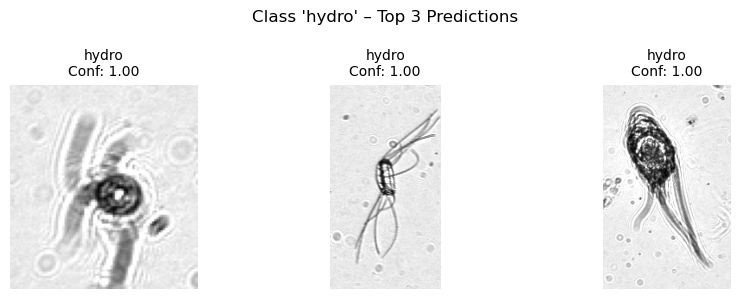

Class 'poly' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7678.tiff_ROI_25.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11599.tiff_ROI_5.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7668.tiff_ROI_24.tif, Confidence: 1.0000


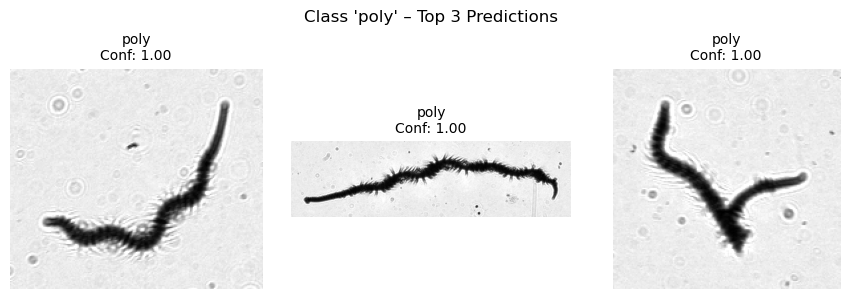

Class 'ptero' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12184.tiff_ROI_11.tif, Confidence: 0.9999
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1720.tiff_ROI_8.tif, Confidence: 0.9999
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3491.tiff_ROI_3.tif, Confidence: 0.9998


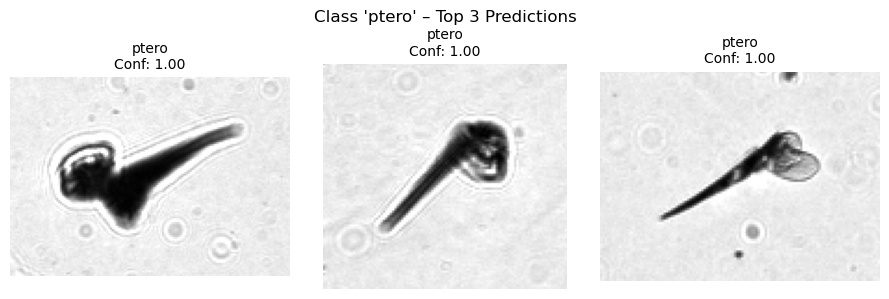

Class 'rhiz' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10757.tiff_ROI_20.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12008.tiff_ROI_17.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10729.tiff_ROI_31.tif, Confidence: 1.0000


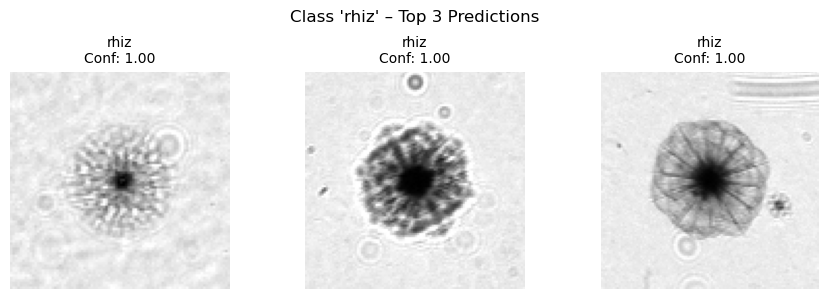

Class 'salp' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1666.tiff_ROI_0.tif, Confidence: 0.9998
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6020.tiff_ROI_8.tif, Confidence: 0.9997
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9476.tiff_ROI_12.tif, Confidence: 0.9994


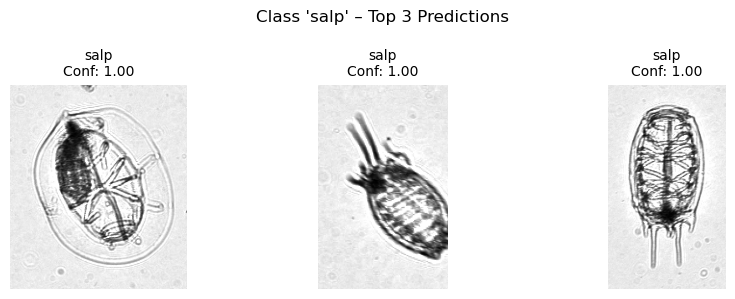

Class 'salpchain' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1199.tiff_ROI_4.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1199.tiff_ROI_8.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1199.tiff_ROI_3.tif, Confidence: 1.0000


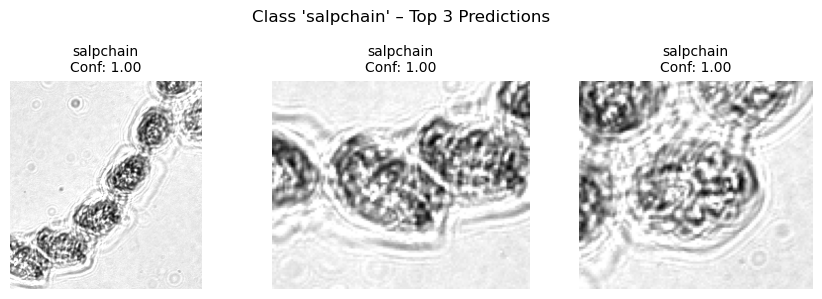

Class 'salpring' – Top 1 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7113.tiff_ROI_27.tif, Confidence: 0.8012


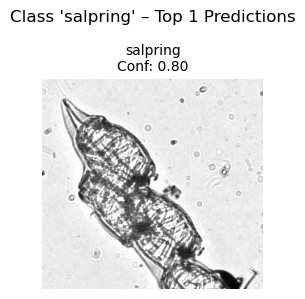

Class 'sapphir' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12814.tiff_ROI_6.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3329.tiff_ROI_4.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6114.tiff_ROI_3.tif, Confidence: 1.0000


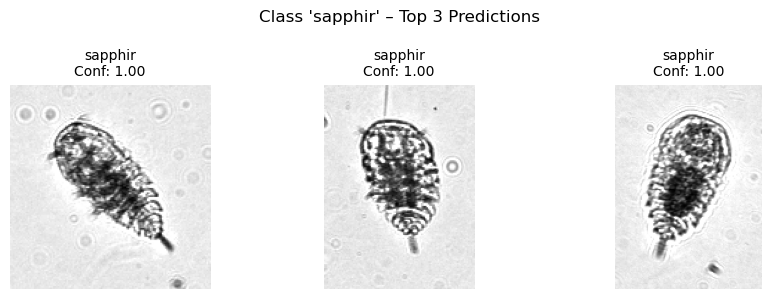

Class 'scypho' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10842.tiff_ROI_15.tif, Confidence: 0.9934
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7151.tiff_ROI_0.tif, Confidence: 0.9865
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7174.tiff_ROI_4.tif, Confidence: 0.9864


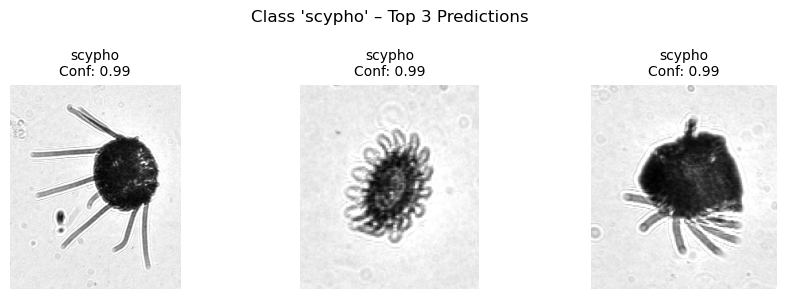

Class 'shrimp' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2171.tiff_ROI_1.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7525.tiff_ROI_33.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2408.tiff_ROI_48.tif, Confidence: 1.0000


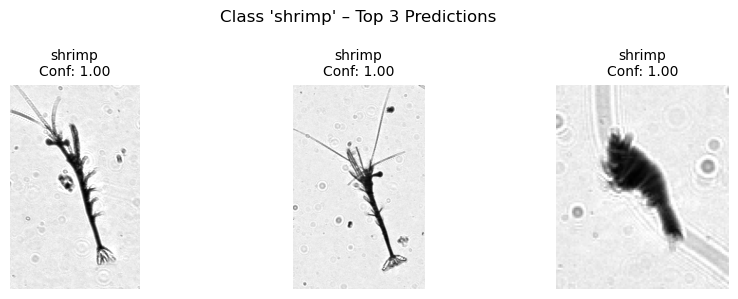

Class 'siphon' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11366.tiff_ROI_4.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9655.tiff_ROI_3.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13438.tiff_ROI_4.tif, Confidence: 1.0000


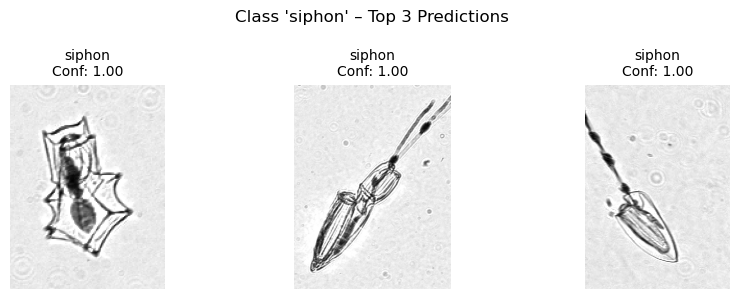

Class 'snow' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11303.tiff_ROI_15.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2550.tiff_ROI_15.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7008.tiff_ROI_11.tif, Confidence: 1.0000


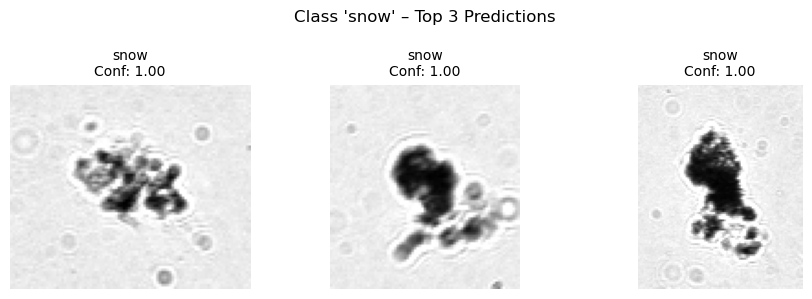

Class 'stoma' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11140.tiff_ROI_21.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11139.tiff_ROI_13.tif, Confidence: 0.9998
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6259.tiff_ROI_26.tif, Confidence: 0.9993


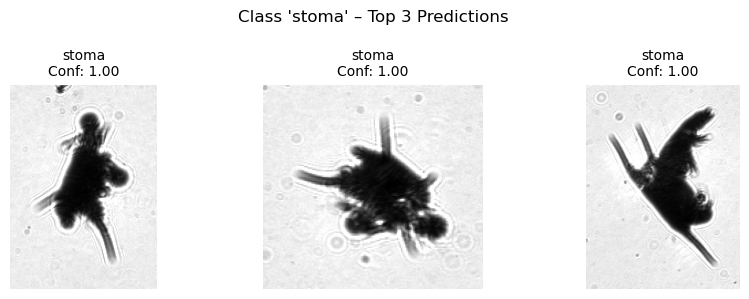

Class 'tricho' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8343.tiff_ROI_18.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7414.tiff_ROI_21.tif, Confidence: 1.0000
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11566.tiff_ROI_4.tif, Confidence: 1.0000


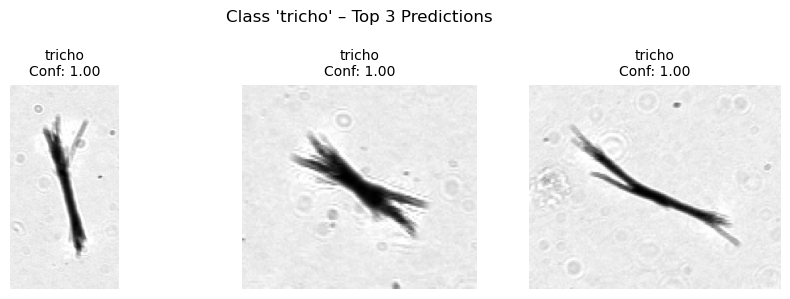

Class 'zooea' – Top 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7162.tiff_ROI_16.tif, Confidence: 0.9814
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12410.tiff_ROI_12.tif, Confidence: 0.9403
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11143.tiff_ROI_11.tif, Confidence: 0.9292


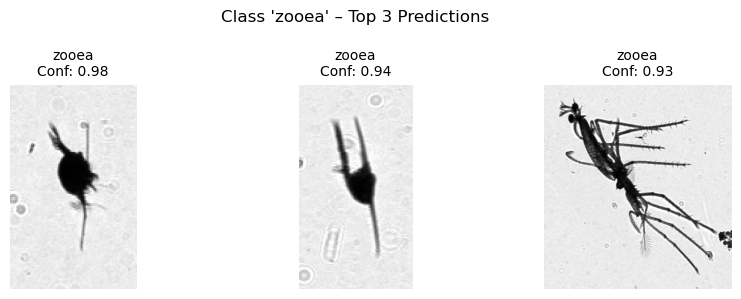

In [8]:
# Show the TOP_K most confident predictions for each predicted class

import os
import matplotlib.pyplot as plt

TOP_K = 3

# Ensure predictions have been loaded
if 'image_paths' not in globals() or 'labels' not in globals() or 'confidences' not in globals():
    raise RuntimeError("Run the 'Load predictions' cell first to define image_paths, labels and confidences.")

if len(image_paths) == 0:
    raise RuntimeError("No predictions available. Check that the CSV was loaded correctly.")

# Use file names for display
image_names = [os.path.basename(p) for p in image_paths]

# Iterate over all predicted classes
unique_classes = sorted(set(labels))
for class_name in unique_classes:

    # indices predicted as this class
    predicted_indices = [
        i for i, lbl in enumerate(labels)
        if lbl == class_name
    ]

    if not predicted_indices:
        continue

    # sort by confidence (high → low)
    top_indices = sorted(
        predicted_indices,
        key=lambda i: confidences[i],
        reverse=True
    )[:TOP_K]

    print(f"Class '{class_name}' – Top {len(top_indices)} Most Confident Predictions:")

    fig, ax = plt.subplots(1, len(top_indices), figsize=(3 * len(top_indices), 3))

    # handle case TOP_K == 1
    if len(top_indices) == 1:
        ax = [ax]

    for j, i in enumerate(top_indices):
        print(f"  Image: {image_names[i]}, Confidence: {confidences[i]:.4f}")

        img_path = image_paths[i]
        try:
            img = plt.imread(img_path)
        except FileNotFoundError:
            print(f"    WARNING: image file not found: {img_path}")

            continue

        ax[j].imshow(img, cmap="gray")
        ax[j].axis("off")
        ax[j].set_title(

            f"{class_name}\nConf: {confidences[i]:.2f}",
            fontsize=10
        )

    plt.suptitle(f"Class '{class_name}' – Top {len(top_indices)} Predictions")
    plt.tight_layout()
    plt.show()

Class 'amphi' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8835.tiff_ROI_0.tif, Confidence: 0.1960
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7251.tiff_ROI_47.tif, Confidence: 0.2644
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3263.tiff_ROI_9.tif, Confidence: 0.4184


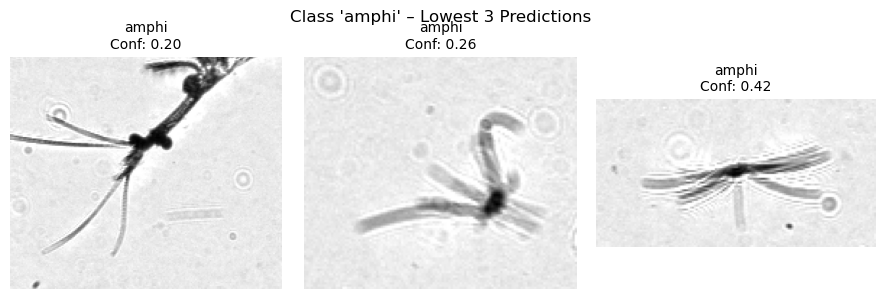

Class 'anemo' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6255.tiff_ROI_10.tif, Confidence: 0.1495
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1899.tiff_ROI_16.tif, Confidence: 0.2528
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10673.tiff_ROI_32.tif, Confidence: 0.2801


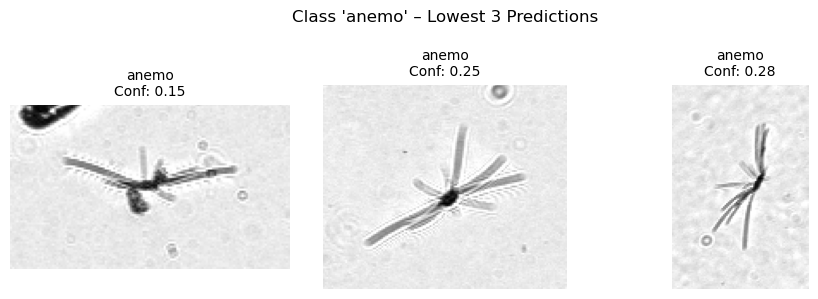

Class 'app' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8819.tiff_ROI_0.tif, Confidence: 0.2048
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5910.tiff_ROI_12.tif, Confidence: 0.2071
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4986.tiff_ROI_12.tif, Confidence: 0.2072


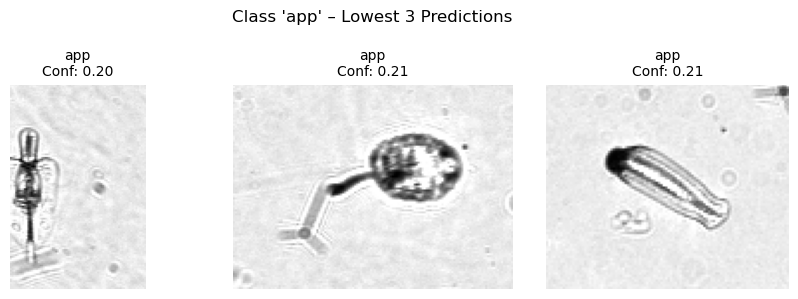

Class 'bubble' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7809.tiff_ROI_31.tif, Confidence: 0.2180
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3428.tiff_ROI_7.tif, Confidence: 0.2301
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7204.tiff_ROI_0.tif, Confidence: 0.2865


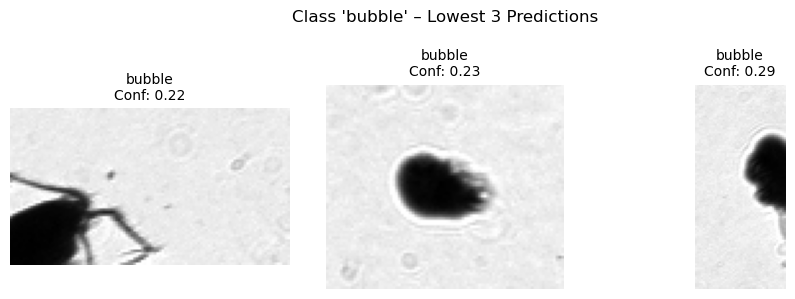

Class 'chaeto' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10768.tiff_ROI_19.tif, Confidence: 0.2273
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0937.tiff_ROI_28.tif, Confidence: 0.2332
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10541.tiff_ROI_4.tif, Confidence: 0.2399


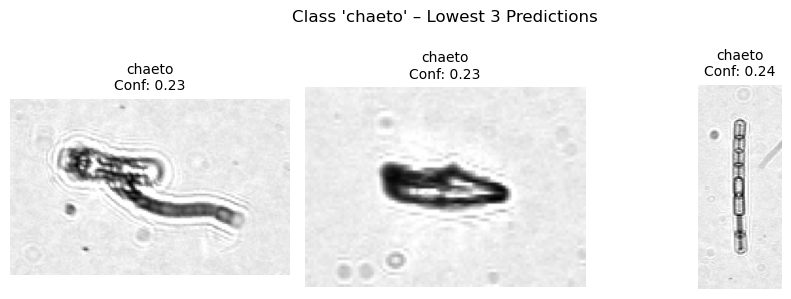

Class 'copepod' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6046.tiff_ROI_7.tif, Confidence: 0.2196
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10961.tiff_ROI_18.tif, Confidence: 0.2305
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7156.tiff_ROI_19.tif, Confidence: 0.2420


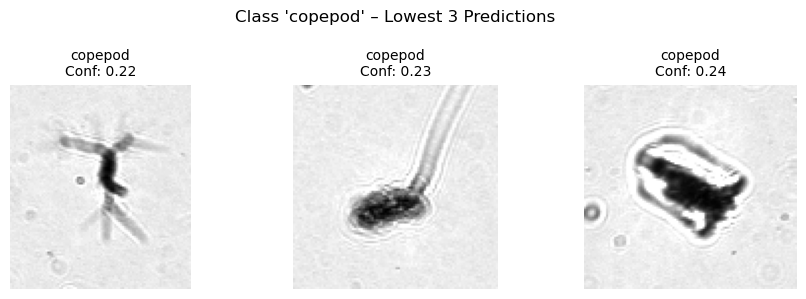

Class 'cteno' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2582.tiff_ROI_14.tif, Confidence: 0.2478
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0915.tiff_ROI_7.tif, Confidence: 0.2503
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6855.tiff_ROI_18.tif, Confidence: 0.2638


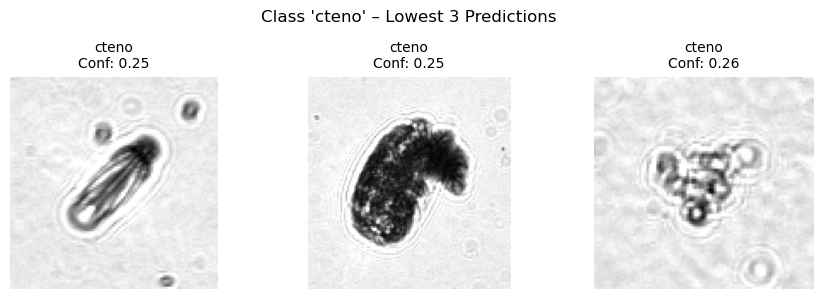

Class 'diatom' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9624.tiff_ROI_9.tif, Confidence: 0.1726
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1712.tiff_ROI_12.tif, Confidence: 0.1861
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12839.tiff_ROI_64.tif, Confidence: 0.2067


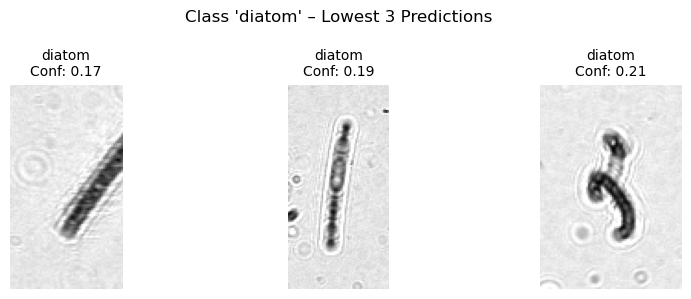

Class 'dolio' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4310.tiff_ROI_10.tif, Confidence: 0.1818
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1536.tiff_ROI_16.tif, Confidence: 0.2505
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11831.tiff_ROI_33.tif, Confidence: 0.2670


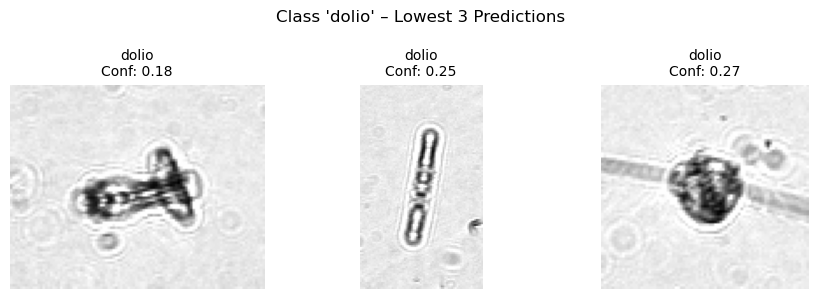

Class 'dolnurse' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10679.tiff_ROI_9.tif, Confidence: 0.1933
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7998.tiff_ROI_15.tif, Confidence: 0.2467
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4538.tiff_ROI_3.tif, Confidence: 0.2655


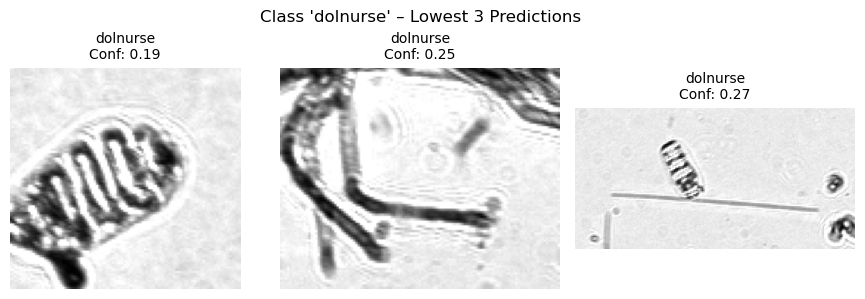

Class 'dolphor' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5753.tiff_ROI_10.tif, Confidence: 0.2404
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3799.tiff_ROI_18.tif, Confidence: 0.2645
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11509.tiff_ROI_20.tif, Confidence: 0.2933


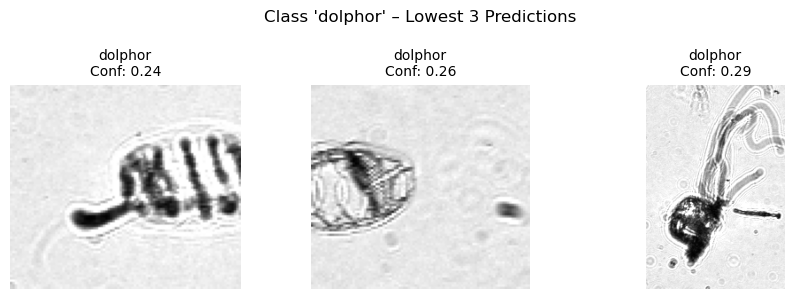

Class 'fish' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4416.tiff_ROI_6.tif, Confidence: 0.1786
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9236.tiff_ROI_13.tif, Confidence: 0.2642
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6365.tiff_ROI_12.tif, Confidence: 0.2777


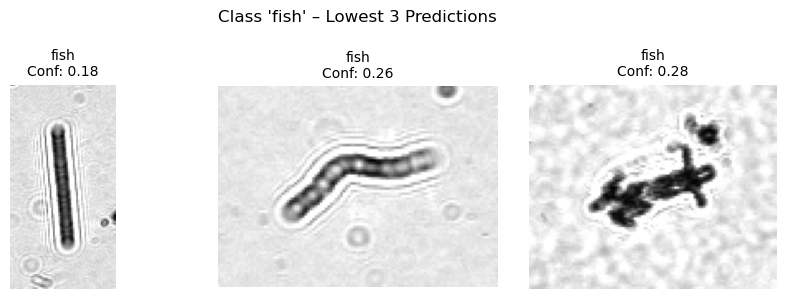

Class 'hetero' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10073.tiff_ROI_17.tif, Confidence: 0.1877
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5812.tiff_ROI_3.tif, Confidence: 0.2341
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10792.tiff_ROI_7.tif, Confidence: 0.3770


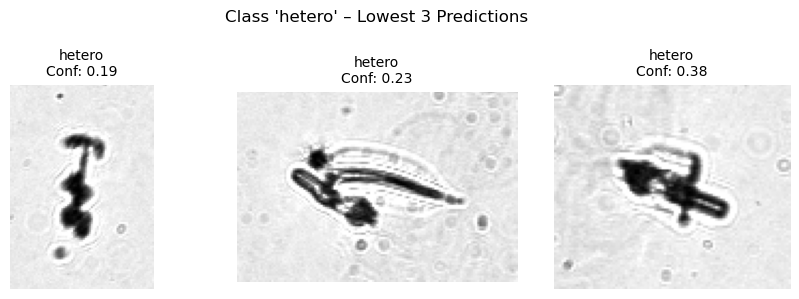

Class 'hydro' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7238.tiff_ROI_5.tif, Confidence: 0.1945
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12418.tiff_ROI_8.tif, Confidence: 0.1958
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12826.tiff_ROI_5.tif, Confidence: 0.2053


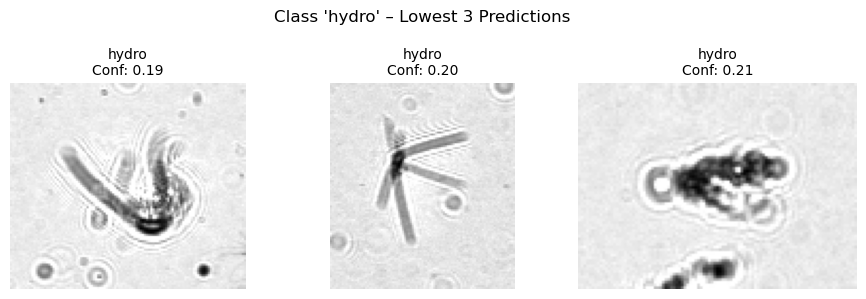

Class 'poly' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8040.tiff_ROI_4.tif, Confidence: 0.1601
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6400.tiff_ROI_3.tif, Confidence: 0.2174
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8171.tiff_ROI_18.tif, Confidence: 0.2292


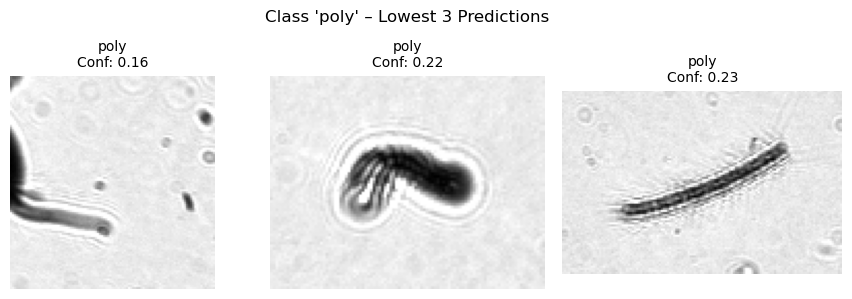

Class 'ptero' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0939.tiff_ROI_6.tif, Confidence: 0.2910
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1120.tiff_ROI_17.tif, Confidence: 0.3053
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6058.tiff_ROI_0.tif, Confidence: 0.3060


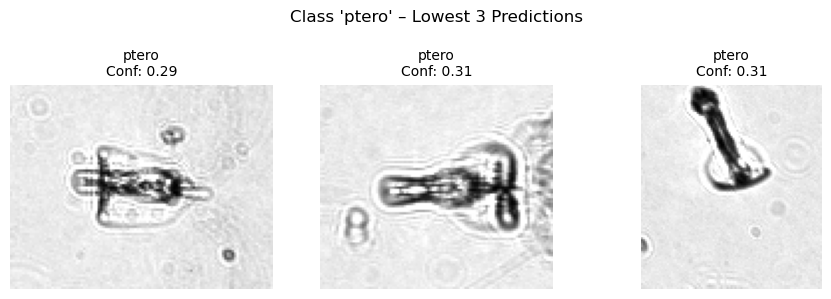

Class 'rhiz' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1895.tiff_ROI_7.tif, Confidence: 0.1433
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13159.tiff_ROI_4.tif, Confidence: 0.1880
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13294.tiff_ROI_12.tif, Confidence: 0.2288


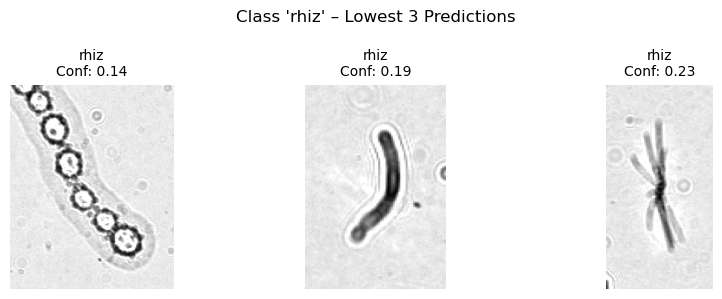

Class 'salp' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10717.tiff_ROI_33.tif, Confidence: 0.2709
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7512.tiff_ROI_19.tif, Confidence: 0.3114
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5031.tiff_ROI_7.tif, Confidence: 0.3213


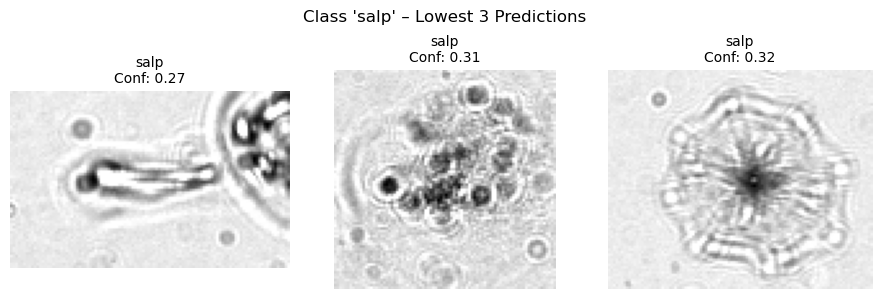

Class 'salpchain' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6428.tiff_ROI_21.tif, Confidence: 0.2421
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_13070.tiff_ROI_13.tif, Confidence: 0.2680
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1199.tiff_ROI_7.tif, Confidence: 0.4352


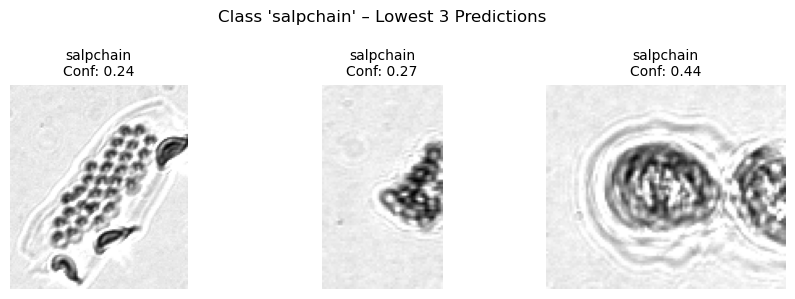

Class 'salpring' – Lowest 1 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7113.tiff_ROI_27.tif, Confidence: 0.8012


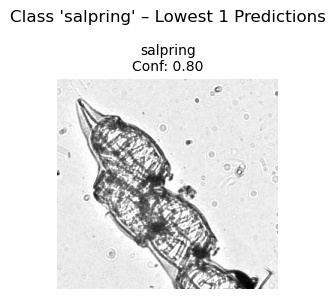

Class 'sapphir' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5408.tiff_ROI_14.tif, Confidence: 0.1751
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5598.tiff_ROI_0.tif, Confidence: 0.2740
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4080.tiff_ROI_0.tif, Confidence: 0.2801


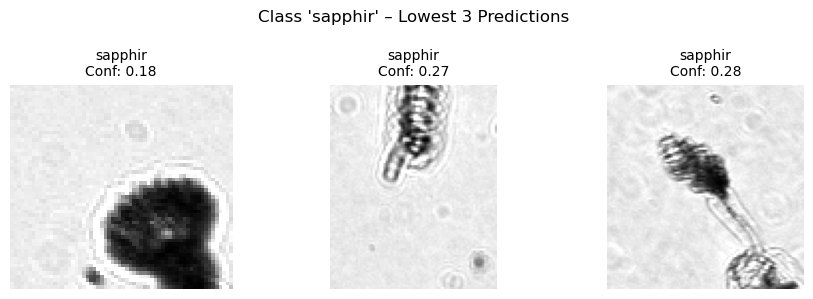

Class 'scypho' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0943.tiff_ROI_10.tif, Confidence: 0.2952
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7339.tiff_ROI_22.tif, Confidence: 0.3215
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_7096.tiff_ROI_20.tif, Confidence: 0.3669


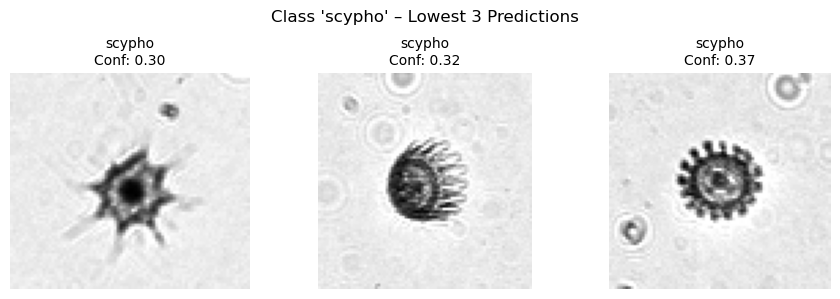

Class 'shrimp' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3896.tiff_ROI_8.tif, Confidence: 0.1876
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_11877.tiff_ROI_15.tif, Confidence: 0.2370
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_6415.tiff_ROI_2.tif, Confidence: 0.2376


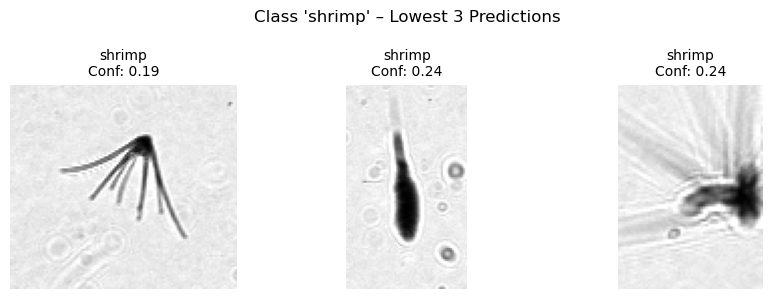

Class 'siphon' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4261.tiff_ROI_29.tif, Confidence: 0.1836
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_5298.tiff_ROI_12.tif, Confidence: 0.1932
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1843.tiff_ROI_20.tif, Confidence: 0.1942


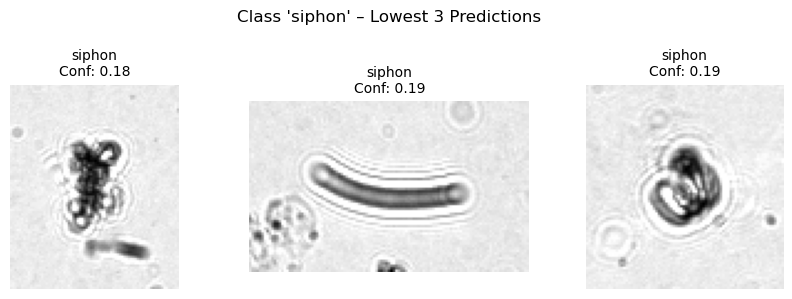

Class 'snow' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_12857.tiff_ROI_5.tif, Confidence: 0.1867
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0721.tiff_ROI_6.tif, Confidence: 0.1986
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_4300.tiff_ROI_6.tif, Confidence: 0.2004


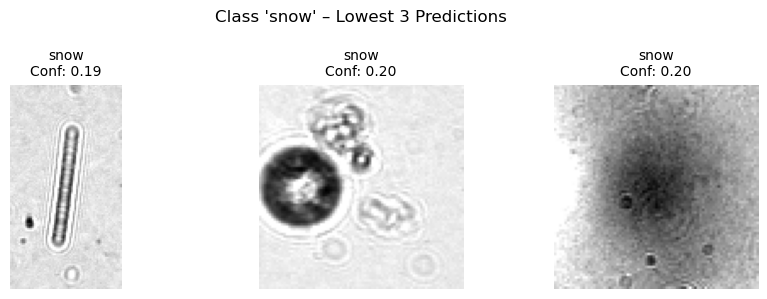

Class 'stoma' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_8994.tiff_ROI_0.tif, Confidence: 0.2230
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_9471.tiff_ROI_6.tif, Confidence: 0.3841
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_0310.tiff_ROI_2.tif, Confidence: 0.4238


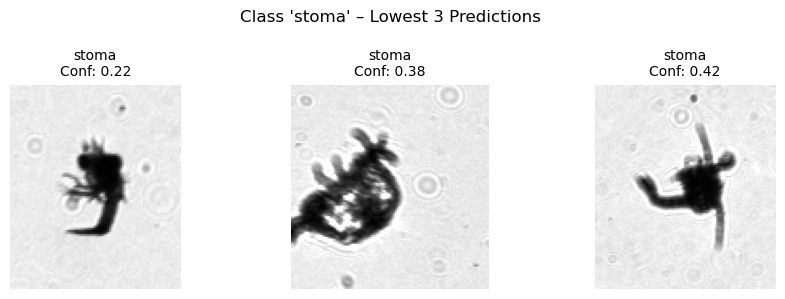

Class 'tricho' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_10891.tiff_ROI_11.tif, Confidence: 0.2106
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2589.tiff_ROI_31.tif, Confidence: 0.2473
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2297.tiff_ROI_7.tif, Confidence: 0.2527


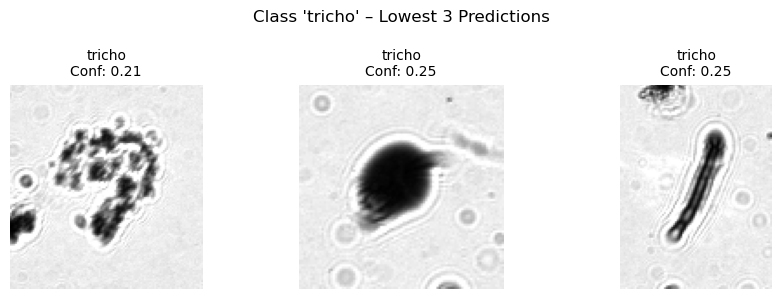

Class 'zooea' – Lowest 3 Most Confident Predictions:
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_1931.tiff_ROI_19.tif, Confidence: 0.2282
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_2406.tiff_ROI_41.tif, Confidence: 0.2355
  Image: Basler_avA2300-25gm__23232601__20240826_113326867_3431.tiff_ROI_1.tif, Confidence: 0.3467


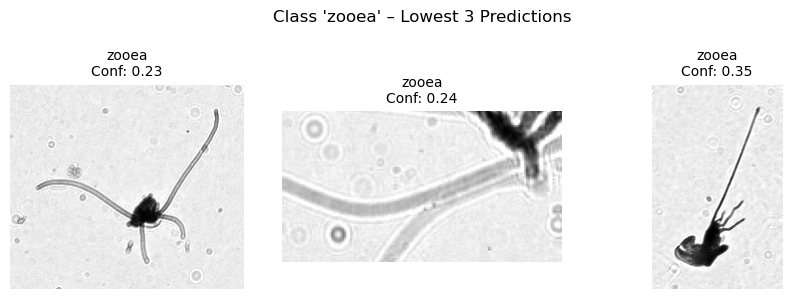

In [7]:
# Show the LOWEST_K most confident (i.e. least certain) predictions for each predicted class

import os
import matplotlib.pyplot as plt

LOWEST_K = 3

# Ensure predictions have been loaded
if 'image_paths' not in globals() or 'labels' not in globals() or 'confidences' not in globals():
    raise RuntimeError("Run the 'Load predictions' cell first to define image_paths, labels and confidences.")

if len(image_paths) == 0:
    raise RuntimeError("No predictions available. Check that the CSV was loaded correctly.")

# Use file names for display
image_names = [os.path.basename(p) for p in image_paths]

# Iterate over all predicted classes
unique_classes = sorted(set(labels))
for class_name in unique_classes:

    # indices predicted as this class
    predicted_indices = [
        i for i, lbl in enumerate(labels)
        if lbl == class_name
    ]

    if not predicted_indices:
        continue

    # sort by confidence (low → high)
    low_indices = sorted(
        predicted_indices,
        key=lambda i: confidences[i]
    )[:LOWEST_K]

    print(f"Class '{class_name}' – Lowest {len(low_indices)} Most Confident Predictions:")
    fig, ax = plt.subplots(1, len(low_indices), figsize=(3 * len(low_indices), 3))

    # handle case LOWEST_K == 1
    if len(low_indices) == 1:
        ax = [ax]

    for j, i in enumerate(low_indices):
        print(f"  Image: {image_names[i]}, Confidence: {confidences[i]:.4f}")

        img_path = image_paths[i]
        try:
            img = plt.imread(img_path)
        except FileNotFoundError:
            print(f"    WARNING: image file not found: {img_path}")
            continue

        ax[j].imshow(img, cmap="gray")
        ax[j].axis("off")
        ax[j].set_title(

            f"{class_name}\nConf: {confidences[i]:.2f}",
            fontsize=10
        )


    plt.suptitle(f"Class '{class_name}' – Lowest {len(low_indices)} Predictions")
    plt.tight_layout()
    plt.show()


In [18]:
# Generate a table with predicted class, count, and mean confidence
from collections import Counter, defaultdict

# `labels` contains the predicted class for each image
counts = Counter(labels)

# Build a sorted table (most frequent classes first)
class_stats_table = []
for cls, cnt in counts.items():
    mean_conf = total_conf_by_class[cls] / cnt if cnt > 0 else 0.0
    class_stats_table.append((cls, cnt, mean_conf))

class_stats_table = sorted(class_stats_table, key=lambda x: x[1], reverse=True)

print(f"{'Class':<25}{'Count':>7}")
print("-" * 50)
for cls, cnt, mean_conf in class_stats_table:
    print(f"{cls:<25}{cnt:>7}")

Class                      Count
--------------------------------------------------
snow                       18863
app                        11075
chaeto                      2488
diatom                      2139
copepod                     1935
hydro                       1268
dolio                       1074
tricho                      1027
fish                         872
rhiz                         805
siphon                       587
poly                         564
shrimp                       539
ptero                        219
dolnurse                     190
cteno                        166
sapphir                      134
bubble                        94
salp                          79
dolphor                       76
anemo                         64
salpchain                     55
stoma                         35
scypho                        27
zooea                         25
amphi                          6
hetero                         5
salpring                 